In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as smf
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df['Date']=pd.to_datetime(df["Date"])

In [8]:
df['Date'].dtype

dtype('<M8[ns]')

In [9]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [10]:
df['Time']=pd.to_datetime(df['Time'])

In [11]:
df['Time'].dtype

dtype('<M8[ns]')

In [12]:
df['Hour']=df['Time'].dt.hour


In [13]:
df['Hour'].nunique()

11

# Exploratory Data Analysis

<Axes: xlabel='Customer type', ylabel='count'>

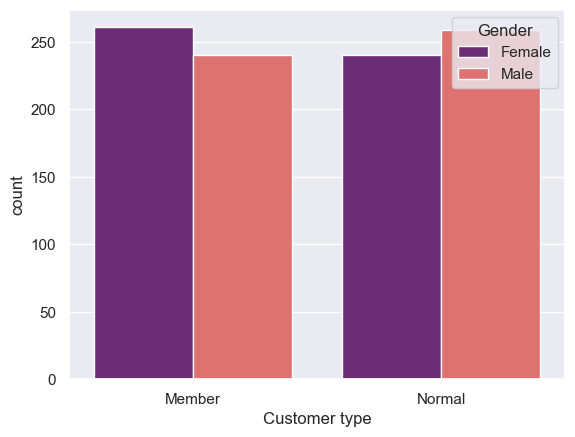

In [14]:
sns.set_theme()
sns.countplot(x = 'Customer type', data = df, hue = 'Gender', palette = "magma")

There is a noticeable difference between male and female population of each category. however, the same plot without says that the total number of people in both categories is almost equal. 

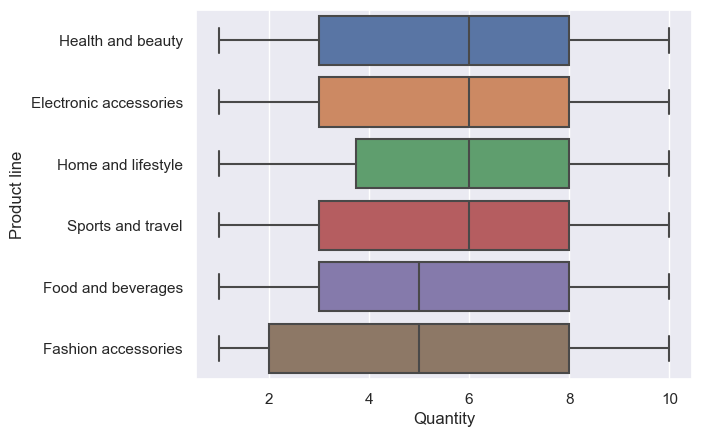

In [15]:
sns.boxplot(x='Quantity',y='Product line',data=df);

Health and beauty,electronic accessories , home and life style , sports and travel havee the better quantity avearage sales.

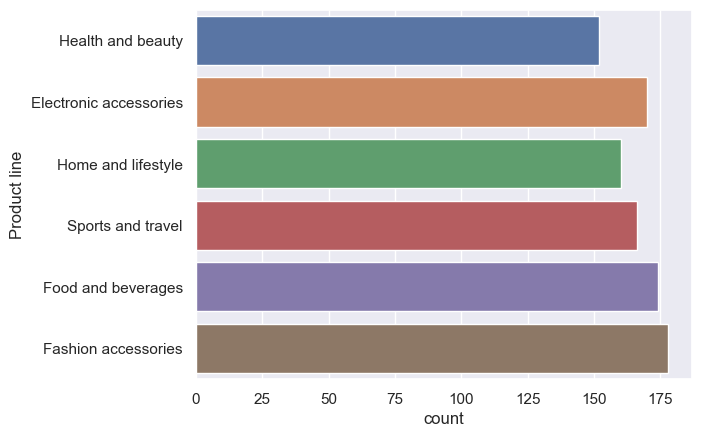

In [16]:
sns.countplot(y='Product line',data=df);

From the figure above fashion accessories is the highst common sold but the healthy and beauty is the lowest

<Axes: xlabel='Product line', ylabel='Unit price'>

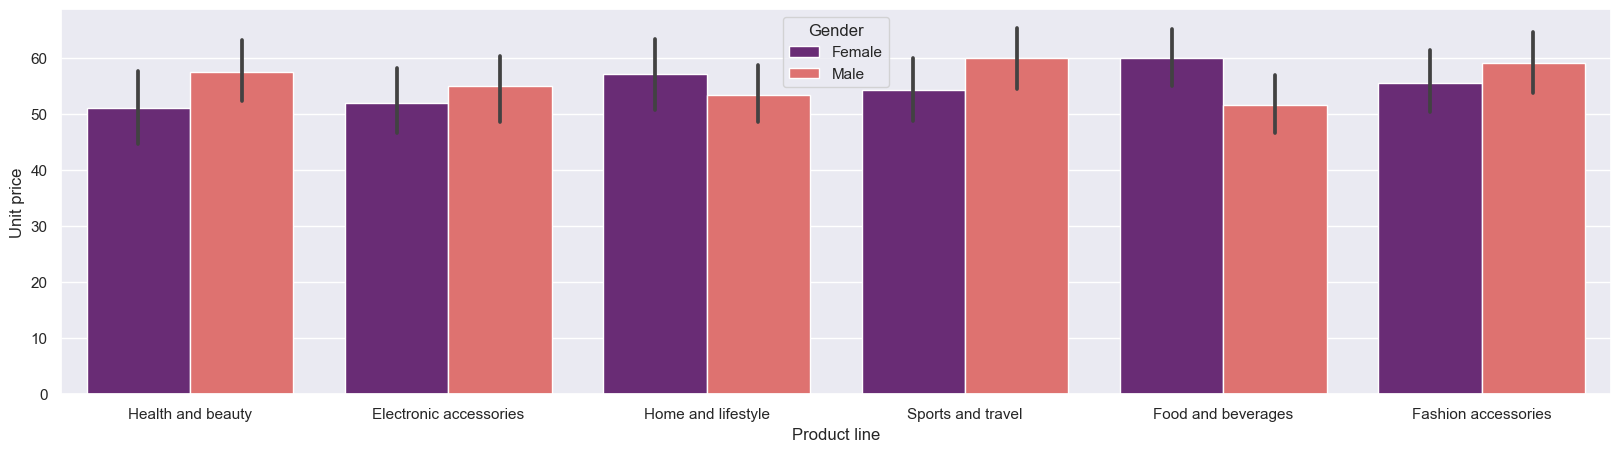

In [17]:
sns.set_theme()
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Unit price', data = df, palette = 'magma', hue ='Gender')

The unit price of all product lines are nearly same as well as their error margins. this is also true when y = 'Ratings', the product unit price difference between both genders is slighly noticeable and has large margins, so maybe significant.

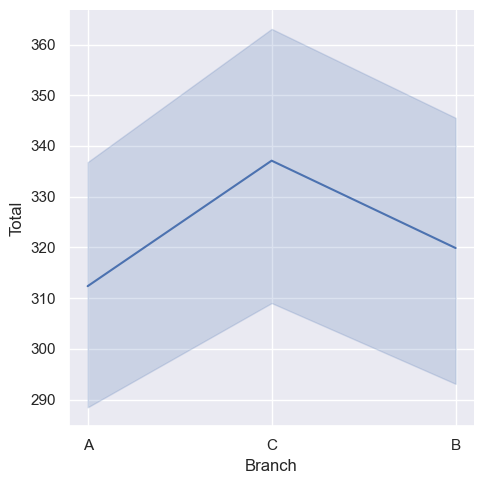

In [18]:
sns.relplot(data=df, x="Branch", y="Total",kind="line")

Branch c has the highst total rate of sales

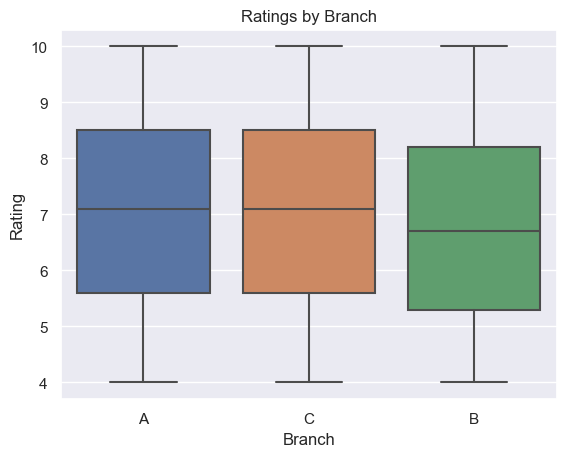

In [19]:
 sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch");

Branch b has the lowest total rate of sales

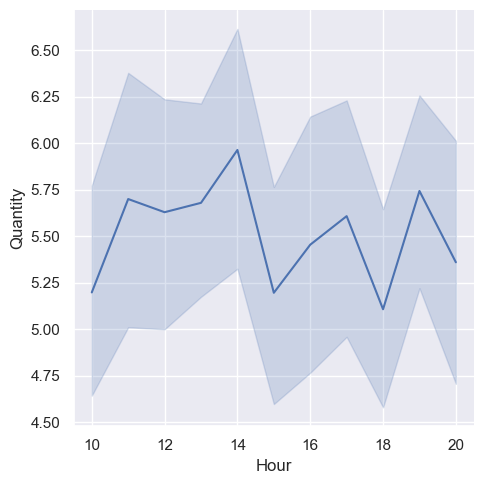

In [20]:
sns.relplot(data=df, x="Hour", y="Quantity",kind="line");

At the hour 14 , highst quantity is sold ever

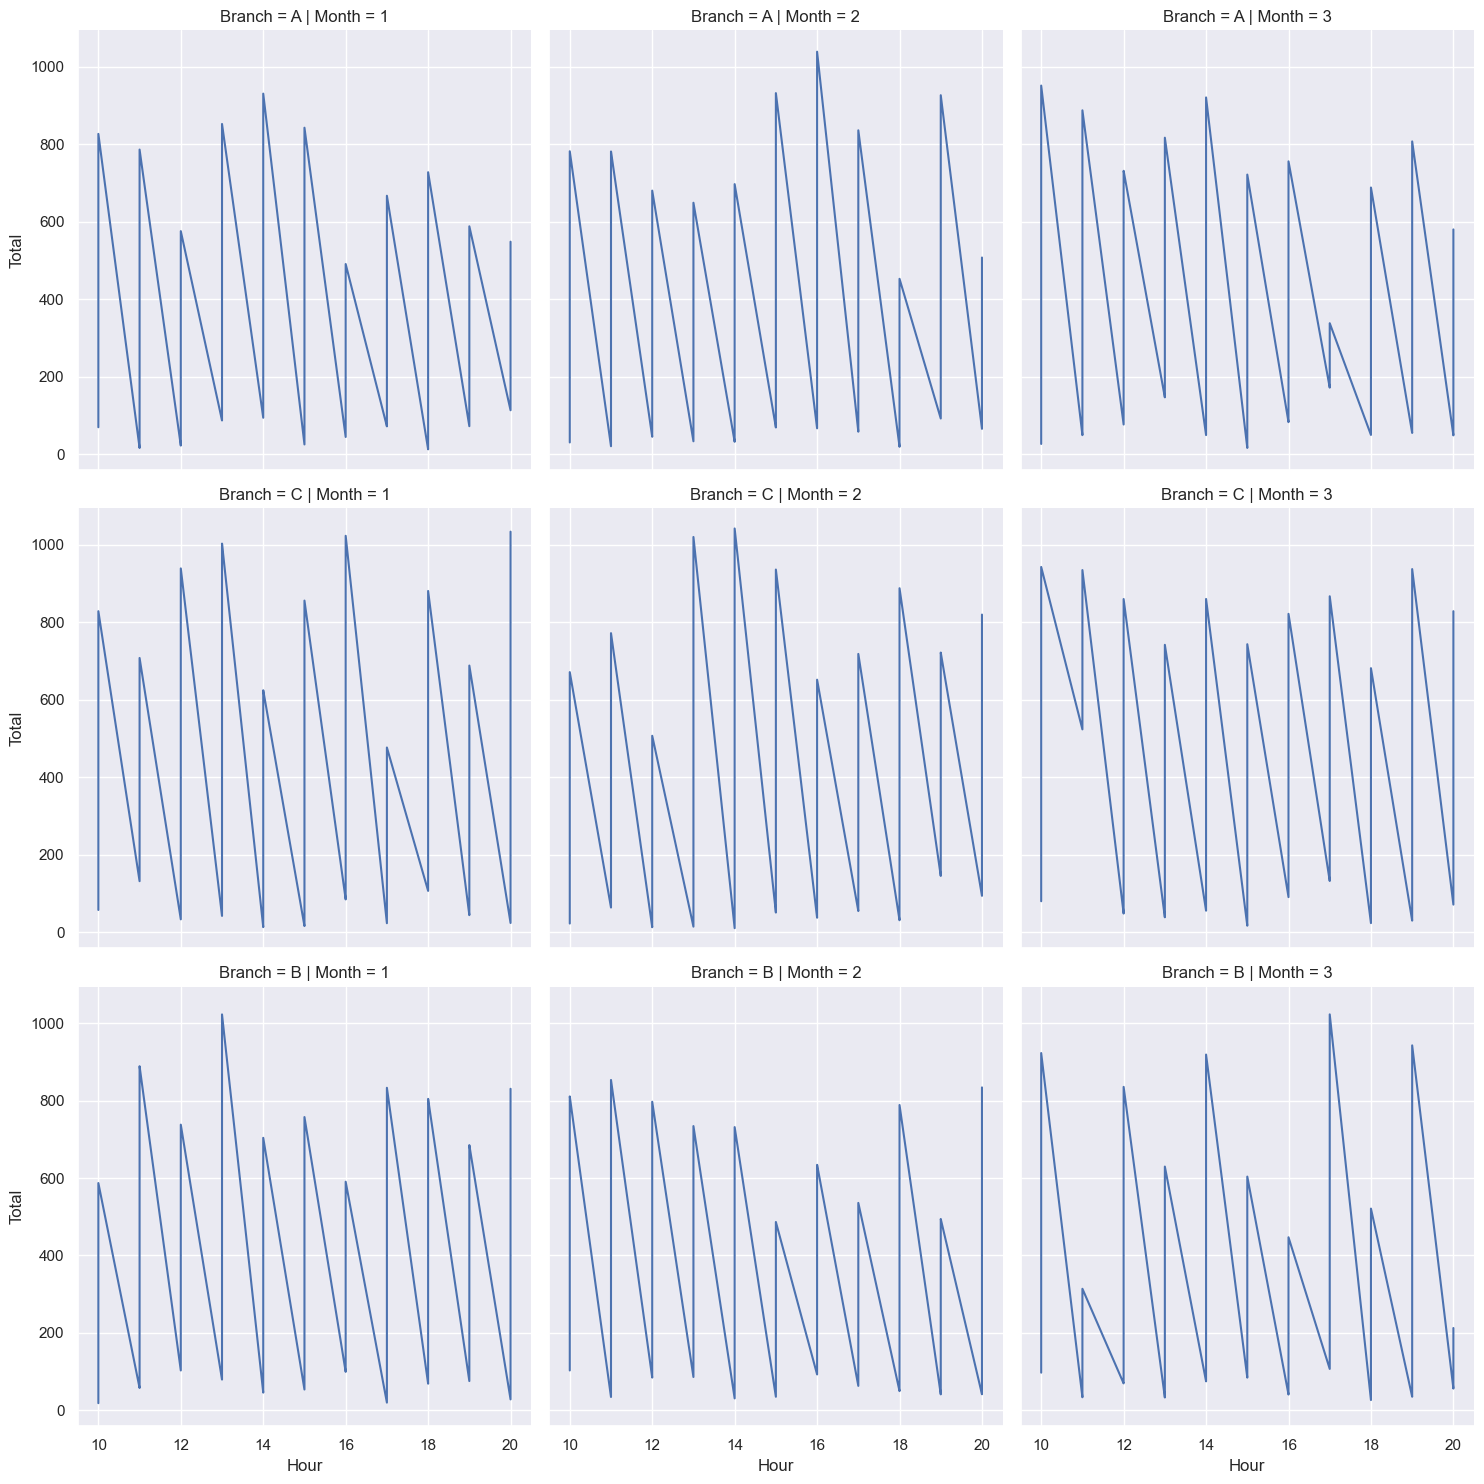

In [21]:
sns.relplot(x="Hour",  y = 'Total', col= 'Month' , row= 'Branch', estimator = None, kind="line", data =df)

We can see from figure above the total of sales in 3 branches through 3 monthes per hour

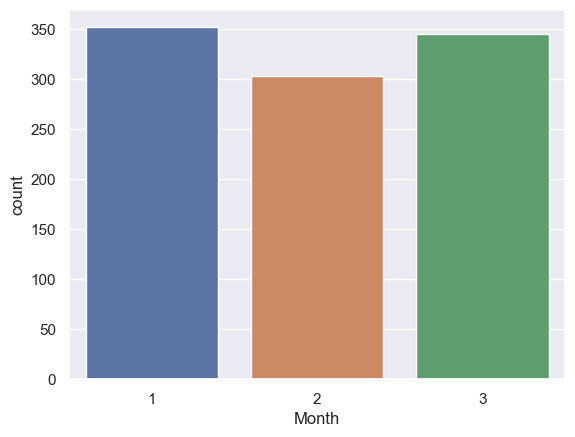

In [22]:
sns.countplot(data=df, x="Month");

Months with the highst rate of sales are 3 and 1

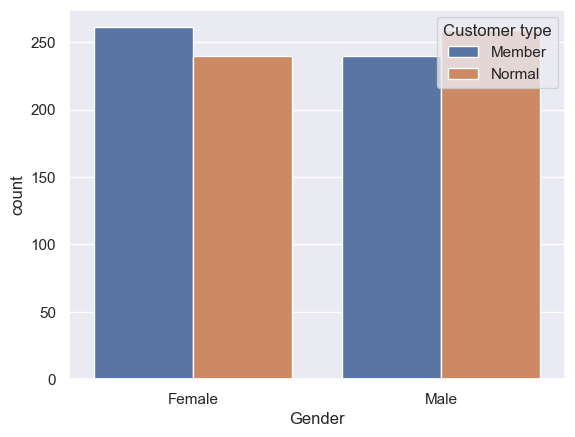

In [23]:
sns.countplot(data=df, x="Gender",hue='Customer type');

Most of female customers are members but the most of males customers are normals

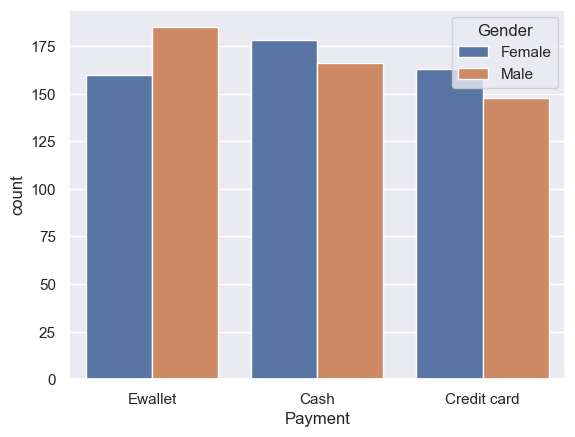

In [24]:
sns.countplot(data=df, x="Payment",hue='Gender');


Most of males customers prefers Ewallet payment but most of females customers prefer cash payment

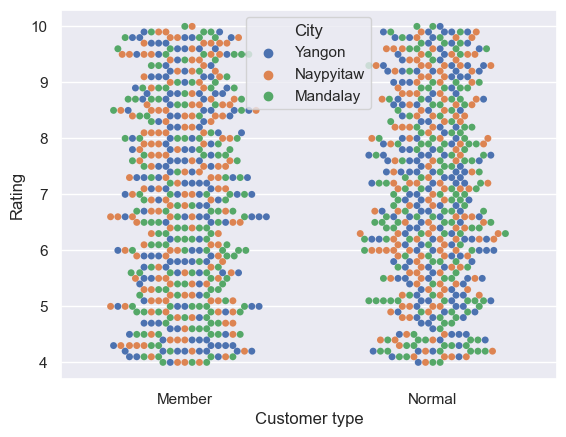

In [25]:
sns.swarmplot(x='Customer type',y='Rating',hue='City',data=df);

# Modeling

In [ ]:
X = df['Rating']
y = df['Total']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.50,random_state=100)

In [ ]:
X_train.shape

In [ ]:
X_train.values.reshape(-1,1)

In [ ]:
X_train.values.reshape(-1,1).shape

In [ ]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.predict([[2.9]])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
X_test

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
len(y_test)

In [ ]:
x_range = [i for i in range(len(y_test))]

In [ ]:
x_range

In [ ]:
plt.scatter(x_range, y_test)
plt.scatter(x_range, y_pred)
plt.title('Prediction')
plt.xlabel('Rating')
plt.ylabel('Total')
plt.legend(["Real", "Predicted"])
plt.show()

In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
rsq = r2_score(y_test,y_pred)

In [ ]:
print('mean squared error :',mse)
print('r square :',rsq)

In [ ]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

In [ ]:
model = smf.ols(formula = 'Total ~ Rating', data = df)

In [ ]:
result = model.fit()

# OLS Regression Result

In [ ]:
print(result.summary())

# Model Testing

In [ ]:
def predict(x):
    a= lr.predict([[x]])
    return a

In [ ]:
predict(3.5)